In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import csv

A simple data loading function.

In [2]:
# import training data 
def load_data(csvname):
    # load in data
    reader = csv.reader(open(csvname, "rb"), delimiter=",")
    d = list(reader)

    # import data and reshape appropriately
    data = np.array(d).astype("float")
    X = data[:,0:2]
    y = data[:,2]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

Gradient descent functionality comes next - a function for computing gradients and the descent loop for soft-margin SVM.

In [3]:
# function for computing the softmax cost gradient
def compute_gradient(X,y,w,lam):
    # produce gradient for each class weights
    grad = 0
    for p in range(0,len(y)):
        x_p = X[:,p]
        y_p = y[p]
        grad+= -2*max(0,1 - y_p*np.dot(x_p.T,w))*y_p*x_p 
    grad.shape = (len(grad),1)
    grad += 2*lam*w 
    return grad

# gradient descent function for softmax cost/logistic regression 
def soft_svm_gradient_descent(X,y,lam):
    # Initializations 
    w = np.random.randn(3,1);        # random initial point
    alpha = 10**-2
    k = 1
    max_its = 2000
    grad = 1
    
    for k in range(max_its):
        # compute gradient
        grad = compute_gradient(X,y,w,lam)
        
        # take gradient step
        w = w - alpha*grad;
        
    return w

A simple plotting function - for showing the dataset and separators.

In [4]:
# plots everything 
def plot_all(X,y,w,lam):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    
    # scatter plot points
    fig = plt.figure(figsize = (4,4))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
    
    # plot separator
    s = np.linspace(-1,1,100) 
    plt.plot(s,(-w[0]-w[1]*s)/w[2],color = 'k',linewidth = 2)
    
    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('soft-margin svm with lambda = ' + str(lam))
    plt.show()

With everything defined, lets run all.

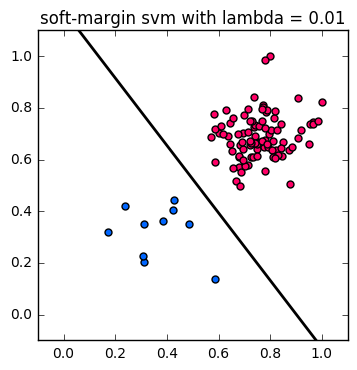

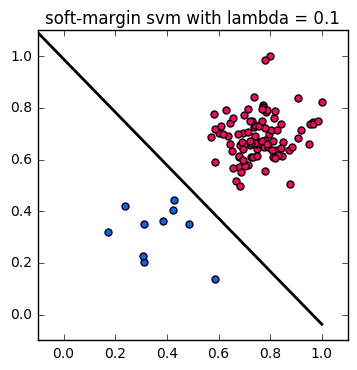

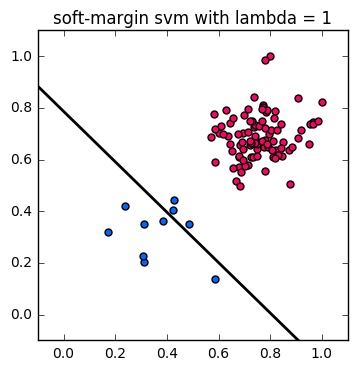

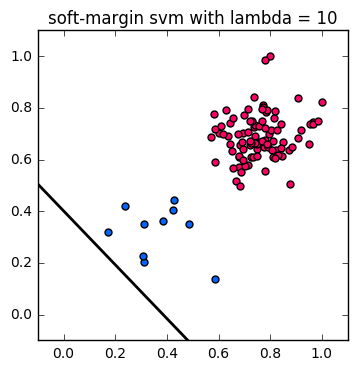

In [5]:
# load in data
X,y = load_data('imbalanced_2class.csv')

# run soft-margin svm over a range of regularization parameters lambda in [10**-2, 10**-1, 1, 10]
lams = [10**-2, 10**-1, 1, 10]
for lam in lams:
    # run gradient descent
    w = soft_svm_gradient_descent(X,y,lam)

    # plot points and separator
    plot_all(X,y,w,lam)